In [37]:
import numpy as np
from skimage import io, color, img_as_ubyte, data
from matplotlib import pyplot as plt


### Image Bit Slicing Plane
---
* Read and display image to operate on
* Next we convert the image to its grayscale version so that each pixel can correspond to its image plane.  
For instance a pixel value of `9` will correspond 9 bit string `0001001`  

(-0.5, 1599.5, 899.5, -0.5)

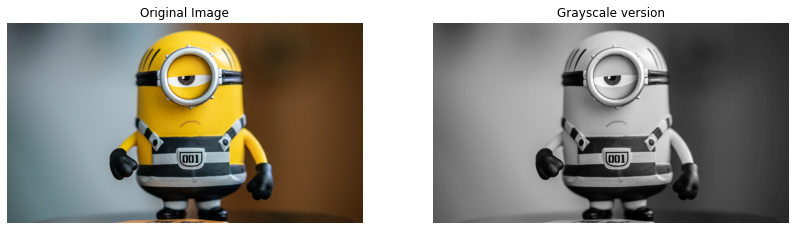

In [66]:
img = io.imread('./img1.jpeg')
img_gray = color.rgb2gray(img)  
img_gray = img_as_ubyte(img_gray)

fig,ax = plt.subplots(1,2, figsize=(14,7))

ax[0].imshow(img);
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(img_gray,cmap='gray')
ax[1].set_title('Grayscale version');
ax[1].axis('off')

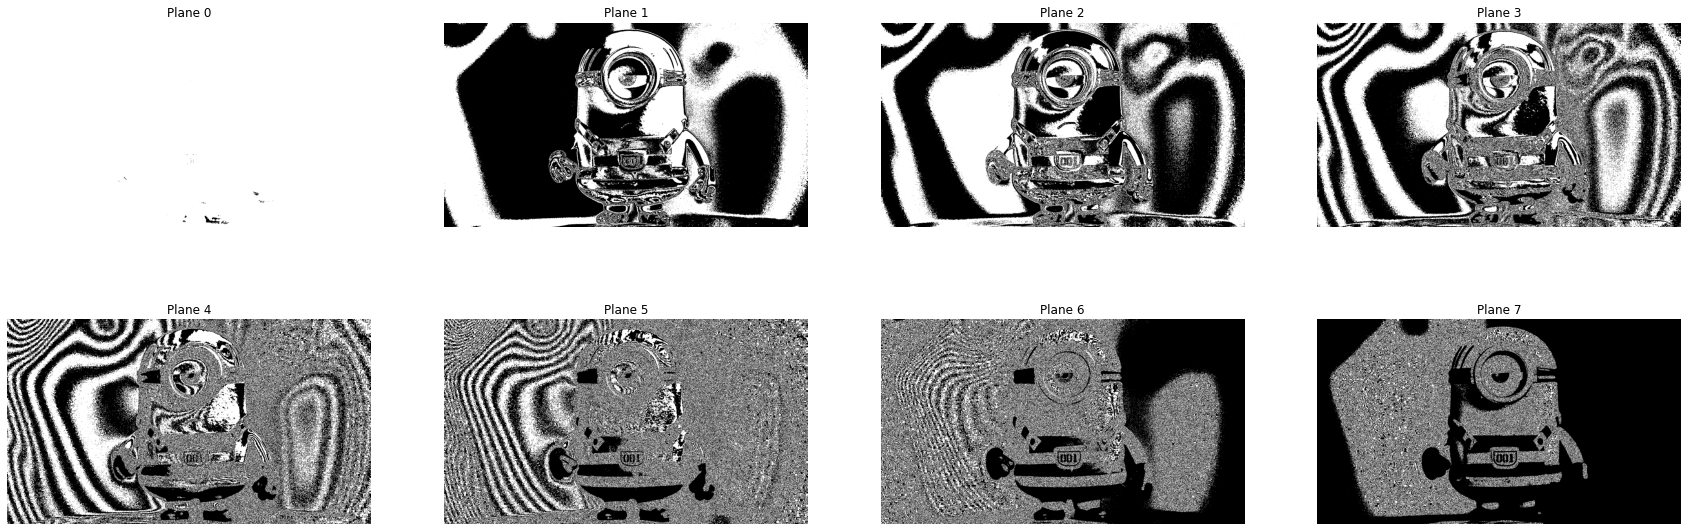

In [67]:
# helpers
#  1
def convert_pixel_to_bits(pixel):
    binary = [int(x) for x in bin(pixel)[2:] ]

    # extend binary to match 8 bit 
    for size in range(8-len(binary)):
        binary.append(0)  
    
    return binary    


# 2
planes = [np.zeros(img_gray.shape) for i in range(8) ]

# 
for i in range(img_gray.shape[0]):
    for j in range(img_gray.shape[1]):
        pixel = img_gray[i,j]
        bits = convert_pixel_to_bits(pixel)
        
        
        # update each plane
        for idx in range(len(bits)):
            planes[idx][i,j] = bits[idx]
            

# dipslay results
fig,ax = plt.subplots(2,4,figsize=(30,10))

idx = 0
for i in range(2):
    for j in range(4):
        ax[i,j].imshow(planes[idx], cmap='gray')
        ax[i,j].set_title('Plane {}'.format(idx))
        ax[i,j].axis('off')
        
        idx += 1

----
To approximate the grayscale version, we can take the last for planes

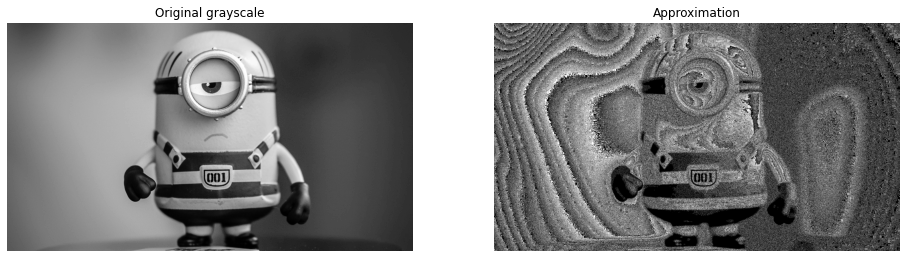

In [70]:
img2 = np.zeros(img_gray.shape) 

for idx in range(7,3,-1):
    img2 = img2 + planes[idx] 
    
fig,ax = plt.subplots(1,2,figsize=(16,10))  

ax[0].imshow(img_gray, cmap='gray')
ax[0].set_title('Original grayscale')
ax[0].axis('off')

ax[1].imshow(img2, cmap='gray')
ax[1].set_title('Approximation')
ax[1].axis('off');